# train_test_split and Random Forest
<br>http://devlopers.google.com/machine-learning/guides/rules-of-ml/

<br>**Model feature combinations**
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior30', 'MinTemp_prior30'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior30', 'MinTemp_prior30'




In [1]:
# Import the libraries
import datetime
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

pd.set_option('max_columns', None)

In [2]:
#import climate_daylength separately for climate plots
climate_daylength = pd.read_csv ('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/climate_daylength6.csv')
print(climate_daylength.shape)
climate_daylength.head()

#import wildflower data with manually added status column for seven species
#bloom_status_hyperlink file is based on df_spring_check output in Capstone2_EDA_Wildflower_phenology notebook
df_status = pd.read_excel('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/bloom_status_hyperlink.xlsx')

#list of flower species that have pre-bloom, in-bloom, and senesced observations
status_complete = ['Calochortus albus', 'Adelinia grande', 'Dipsacus sativus', 'Heracleum maximum', 
                   'Achillea millefolium', 'Bellardia trixago', 'Silybum marianum']

df_status = df_status[df_status['genus_species'].isin(status_complete)]

print(df_status.shape)
df_status.head()



(12614, 50)
(1116, 39)


,Unnamed: 0,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,genus_species,genus,species,latitude,longitude,url,image_url,hyperlink,status,minTemp,maxTemp,day_length,prec_daily,prec_cum_WY,MonSumPrec,WkSumPrec,sum_prec_prior14,sum_prec_prior30,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
0,15848,67913787,JDGrant,2021-01-06,20210106,2021,1,6,2021,4,13,Achillea millefolium,Achillea,millefolium,37.369520,-121.716400,https://www.inaturalist.org/observations/67913787,https://static.inaturalist.org/photos/10984932...,https://static.inaturalist.org/photos/10984932...,0.0,39.5,56.5,34932,0.00,2.570,4.090,0.33,0.625,2.225,56.5,35.5,53.250000,39.285714,34932,69.0,35.0,55.316667,40.000000,34932
1,1928,104737736,Sunol,2022-01-10,20220110,2022,1,10,2022,4,14,Achillea millefolium,Achillea,millefolium,37.532265,-121.813078,https://www.inaturalist.org/observations/10473...,https://inaturalist-open-data.s3.amazonaws.com...,https://inaturalist-open-data.s3.amazonaws.com...,0.0,40.0,63.5,35108,0.00,8.720,0.010,0.00,0.265,4.500,63.5,29.0,56.535714,40.750000,35108,63.5,29.0,55.383333,40.483333,35108
2,16026,37506377,Garin,2020-01-11,20200111,2020,1,11,2020,4,14,Achillea millefolium,Achillea,millefolium,37.646397,-122.042595,https://www.inaturalist.org/observations/37506377,https://inaturalist-open-data.s3.amazonaws.com...,https://inaturalist-open-data.s3.amazonaws.com...,0.0,42.0,58.0,35102,0.02,4.050,1.400,0.32,0.460,1.250,63.0,37.0,58.642857,41.214286,35102,63.0,36.0,58.166667,42.533333,35102
3,15236,104948979,JDGrant,2022-01-14,20220114,2022,1,14,2022,4,14,Achillea millefolium,Achillea,millefolium,37.323371,-121.700640,https://www.inaturalist.org/observations/10494...,https://inaturalist-open-data.s3.amazonaws.com...,https://inaturalist-open-data.s3.amazonaws.com...,0.0,42.0,59.5,35448,0.00,13.075,0.105,0.00,0.105,4.560,64.5,31.0,56.535714,41.857143,35448,64.5,31.0,52.300000,39.250000,35448
4,15239,105516029,JDGrant,2022-01-24,20220124,2022,1,24,2022,4,16,Achillea millefolium,Achillea,millefolium,37.345008,-121.707108,https://www.inaturalist.org/observations/10551...,https://inaturalist-open-data.s3.amazonaws.com...,https://inaturalist-open-data.s3.amazonaws.com...,1.0,40.0,60.0,36352,0.00,13.075,0.105,0.00,0.000,2.240,65.0,40.0,60.571429,43.928571,36352,65.0,31.0,55.200000,40.966667,36352


# Make datasets for plants going into bloom and plants going from bloom to senesced
<br> pre-bloom = plants with no buds yet and plants with unopened buds
<br> in-bloom = plants with open flowers
<br> post-bloom = plants that are no longer in bloom, either completely dried or with seed pods and no open flowers

In [3]:
df = df_status


In [4]:
pre_bloom = df[df['status'] == 0]
buds_bloom = df[df['status'] == 2]
in_bloom = df[df['status'] == 1]
post_bloom = df[df['status'] == 3]

In [5]:
#change clossed bud status to pre-bloom
buds_bloom['status'] = 0
#buds_bloom

/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_13367/249059916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_bloom['status'] = 0


In [6]:
blooming = pd.concat([pre_bloom, buds_bloom, in_bloom], axis=0)
senescing = pd.concat([post_bloom, in_bloom], axis=0)

In [7]:
blooming_counts = blooming.groupby(['genus_species', 'status'])['genus_species'].count()
blooming_counts

genus_species         status
Achillea millefolium  0.0        56
                      1.0       113
Adelinia grande       0.0        14
                      1.0       158
Bellardia trixago     0.0         1
                      1.0       133
Calochortus albus     0.0        22
                      1.0       150
Dipsacus sativus      0.0        64
                      1.0        58
Heracleum maximum     0.0        58
                      1.0        84
Silybum marianum      0.0        44
                      1.0        60
Name: genus_species, dtype: int64

In [8]:
senescing_counts = senescing.groupby(['genus_species', 'status'])['genus_species'].count()
senescing_counts

genus_species         status
Achillea millefolium  1.0       113
Adelinia grande       1.0       158
                      3.0        19
Bellardia trixago     1.0       133
                      3.0        11
Calochortus albus     1.0       150
                      3.0         4
Dipsacus sativus      1.0        58
                      3.0        46
Heracleum maximum     1.0        84
                      3.0         4
Silybum marianum      1.0        60
                      3.0        15
Name: genus_species, dtype: int64

**Summary**
<br>The data are very uneven. 
<br>Most plants are observed in-bloom. Pre and post bloom observations are far fewer in some cases.


# Blooming model: Adelinia grande, Pacific Hound's Tongue

In [9]:
df = blooming[blooming['genus_species']=='Adelinia grande']

In [10]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()

#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(172, 8)
(172, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
170,15.270,34920,8.990,61.0,32.0,54.166667,42.600000,0.0
171,13.075,35609,4.155,65.0,31.0,53.116667,39.950000,0.0
172,5.680,36090,2.990,66.0,35.0,60.466667,44.100000,0.0
174,5.515,36570,2.545,67.5,32.5,60.150000,42.600000,0.0
178,5.890,37331,2.650,77.0,36.0,62.166667,44.833333,0.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

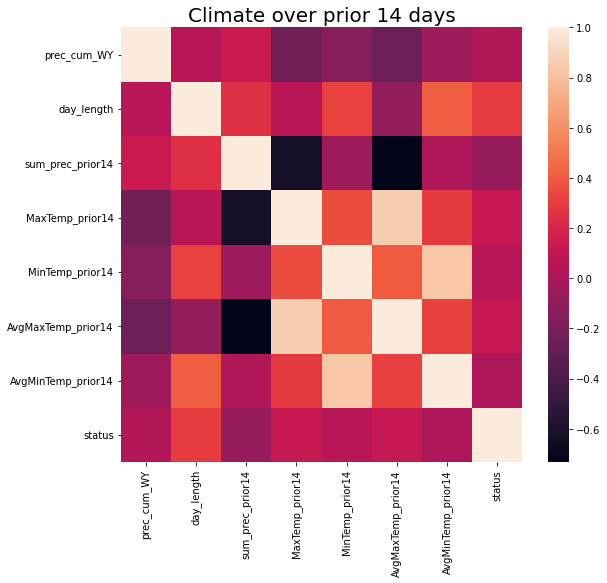

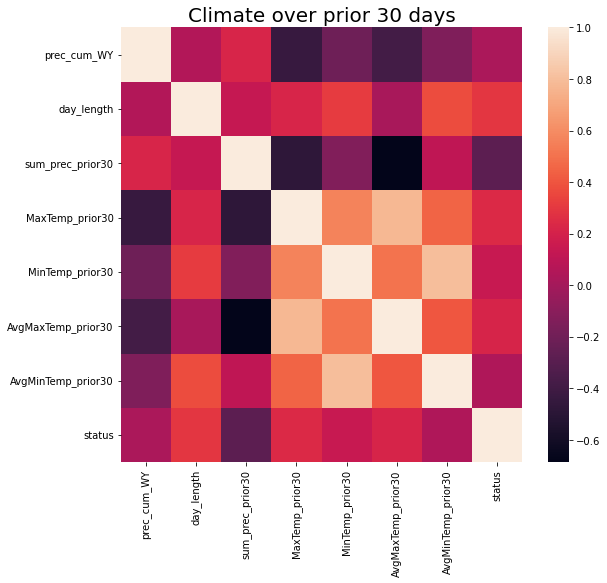

In [11]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

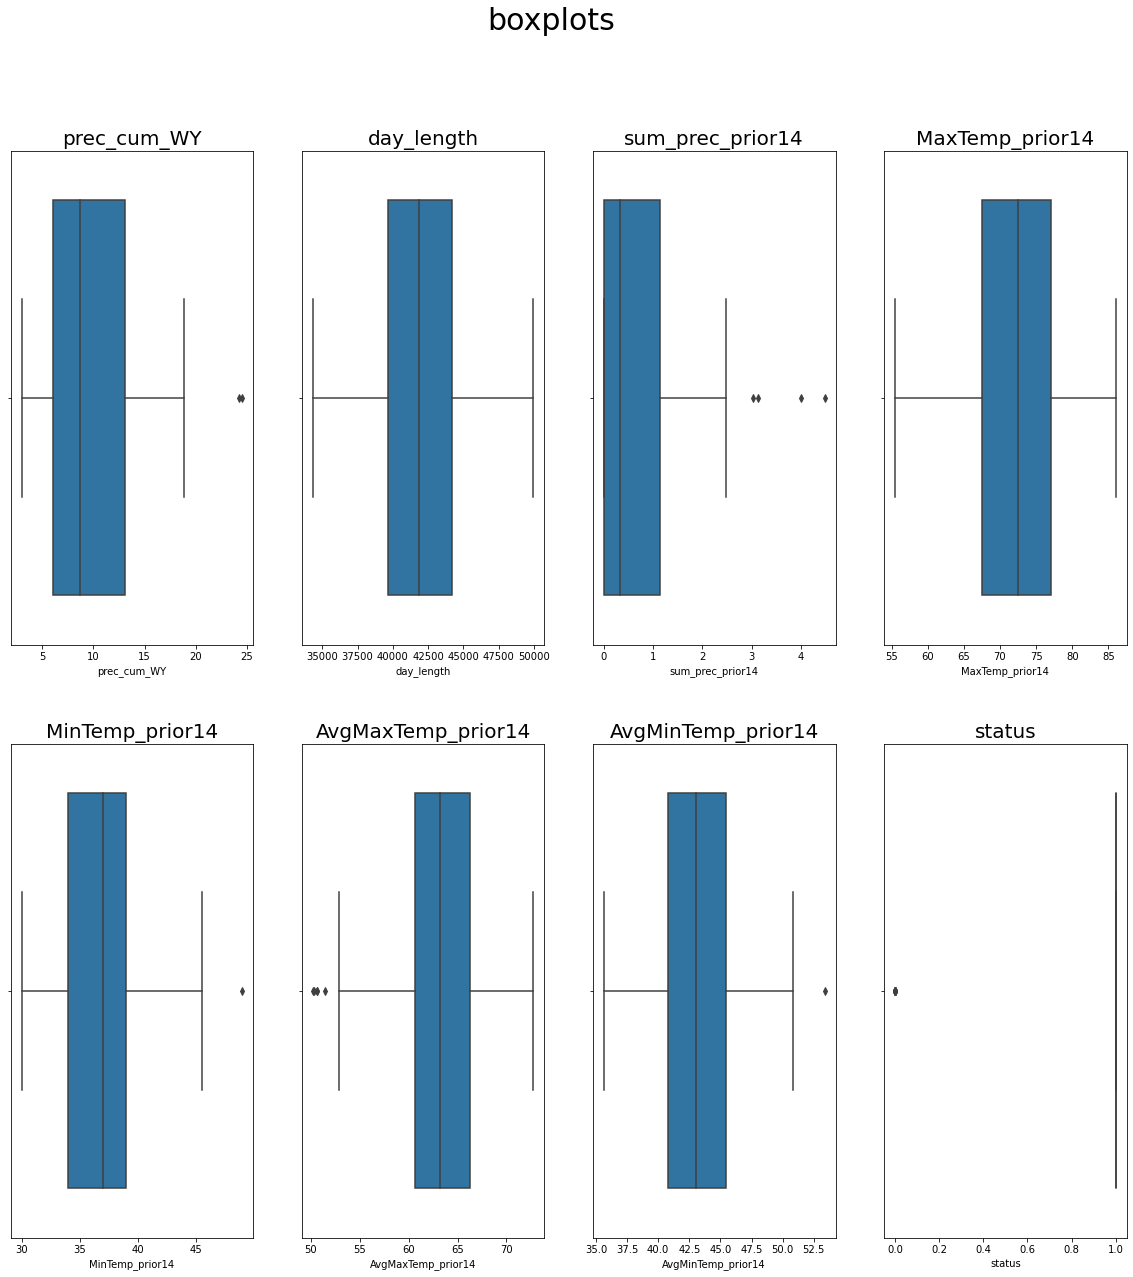

In [12]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax]), 
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [13]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(172, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
170,15.270,34920,0.860,61.0,32.0,54.071429,42.285714,0.0
171,13.075,35609,0.105,65.0,38.5,58.357143,43.928571,0.0
172,5.680,36090,0.140,66.0,36.0,59.285714,45.285714,0.0
174,5.515,36570,1.465,67.5,37.0,62.000000,44.535714,0.0
178,5.890,37331,0.310,77.0,38.0,65.428571,42.285714,0.0


In [14]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.886
Random Forest: f1-score=0.859


7


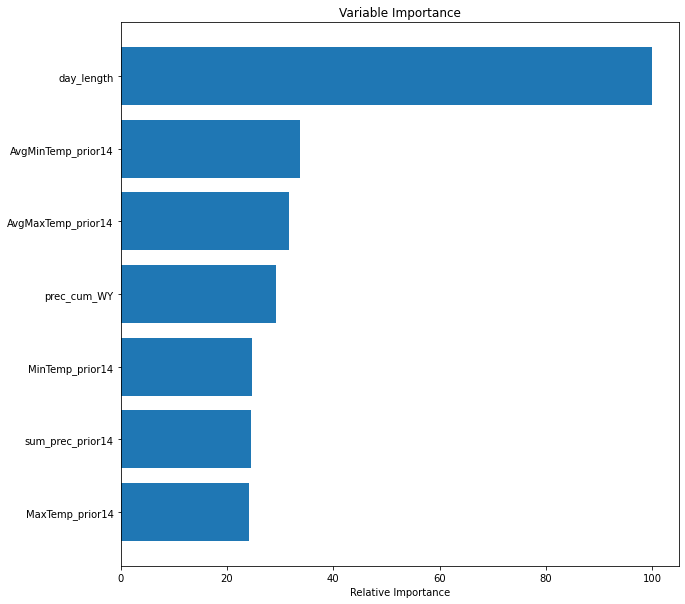

In [15]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [16]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(172, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
170,15.270,34920,8.990,61.0,32.0,54.166667,42.600000,0.0
171,13.075,35609,4.155,65.0,31.0,53.116667,39.950000,0.0
172,5.680,36090,2.990,66.0,35.0,60.466667,44.100000,0.0
174,5.515,36570,2.545,67.5,32.5,60.150000,42.600000,0.0
178,5.890,37331,2.650,77.0,36.0,62.166667,44.833333,0.0


In [17]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [18]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.886
Random Forest: f1-score=0.859


7


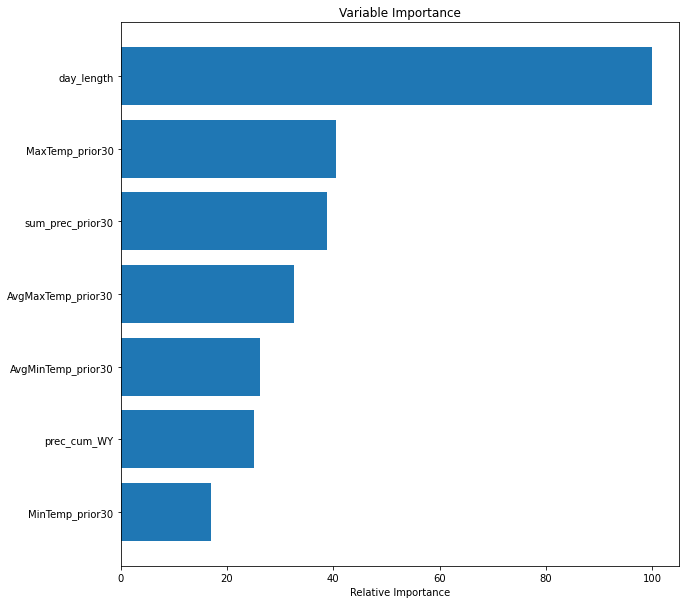

In [19]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Blooming model: Calochortus albus, white mariposa lily

In [20]:
df = blooming[blooming['genus_species']=='Calochortus albus']
print(df.shape)

(172, 39)


In [21]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(172, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
729,5.495,39806,0.645,64.0,36.5,60.250000,42.785714,0.0
730,7.570,44731,0.570,74.0,39.0,63.214286,45.285714,0.0
731,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0
732,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0
733,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

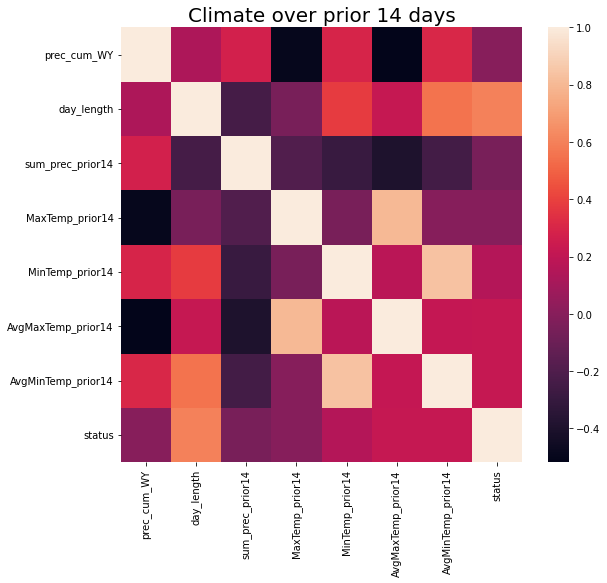

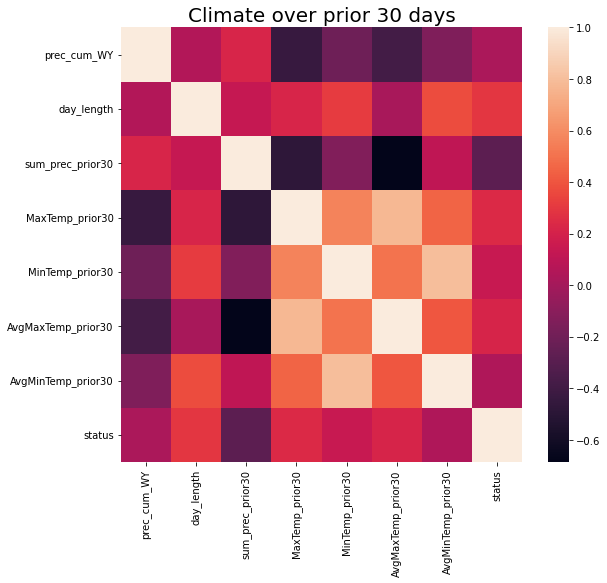

In [22]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

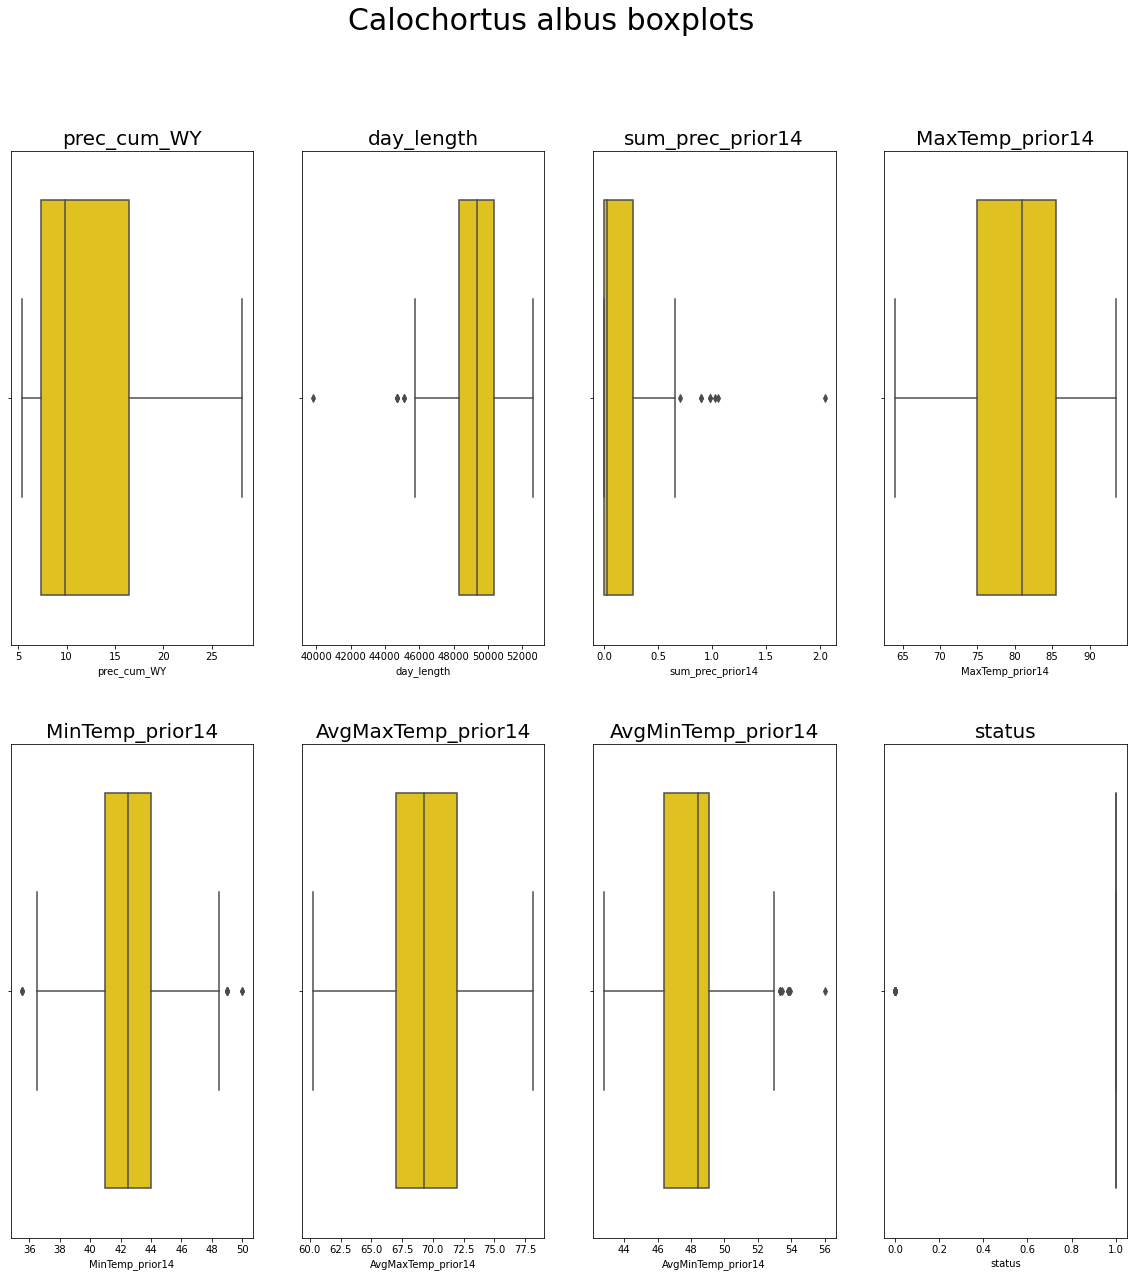

In [23]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Calochortus albus boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax], color='gold'), 
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [24]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(172, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
729,5.495,39806,0.645,64.0,36.5,60.250000,42.785714,0.0
730,7.570,44731,0.570,74.0,39.0,63.214286,45.285714,0.0
731,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0
732,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0
733,15.690,44695,0.290,78.0,41.0,64.214286,46.285714,0.0


In [25]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.943
Random Forest: f1-score=0.938


7


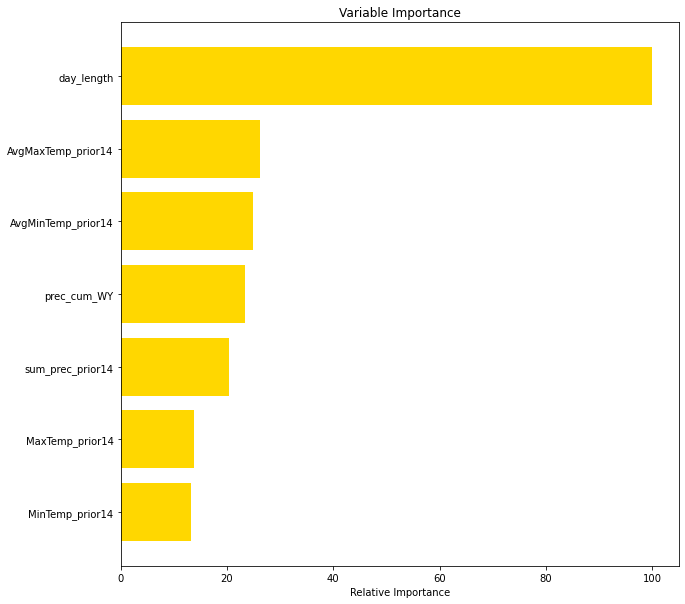

In [26]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='gold')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [27]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(172, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
729,5.495,39806,3.285,68.0,30.0,59.683333,41.516667,0.0
730,7.570,44731,1.620,74.0,39.0,63.566667,45.333333,0.0
731,15.690,44695,0.420,78.0,35.0,64.133333,43.766667,0.0
732,15.690,44695,0.420,78.0,35.0,64.133333,43.766667,0.0
733,15.690,44695,0.420,78.0,35.0,64.133333,43.766667,0.0


In [28]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [29]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.943
Random Forest: f1-score=0.938


7


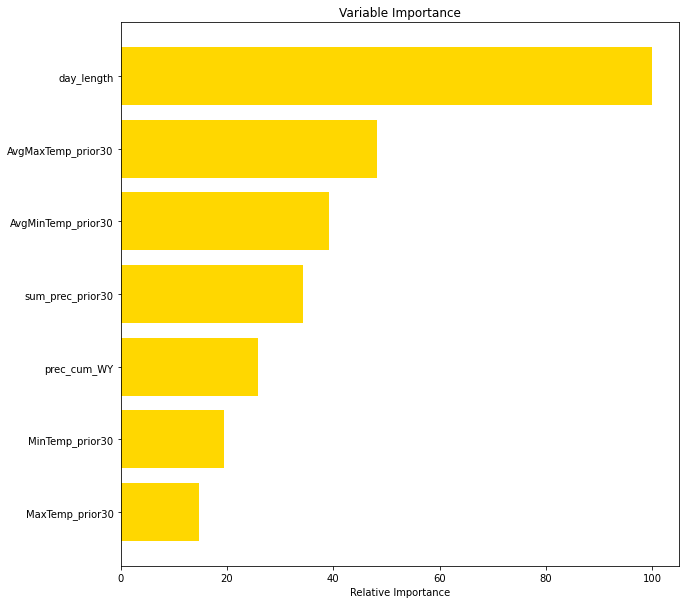

In [30]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='gold')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Blooming model: Silybum marianum, zebra thistle

In [31]:
df = blooming[blooming['genus_species']=='Silybum marianum']
print(df.shape)

(104, 39)


In [32]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(104, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
4143,15.15,34589,4.17,58.0,32.0,52.785714,41.928571,0.0
4144,15.25,34679,4.06,58.0,32.0,53.142857,42.642857,0.0
4145,15.27,34899,1.00,57.0,32.0,53.357143,42.285714,0.0
4147,3.80,35190,0.91,64.0,37.0,59.714286,44.714286,0.0
4148,15.27,35939,0.00,68.0,39.0,59.357143,42.357143,0.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

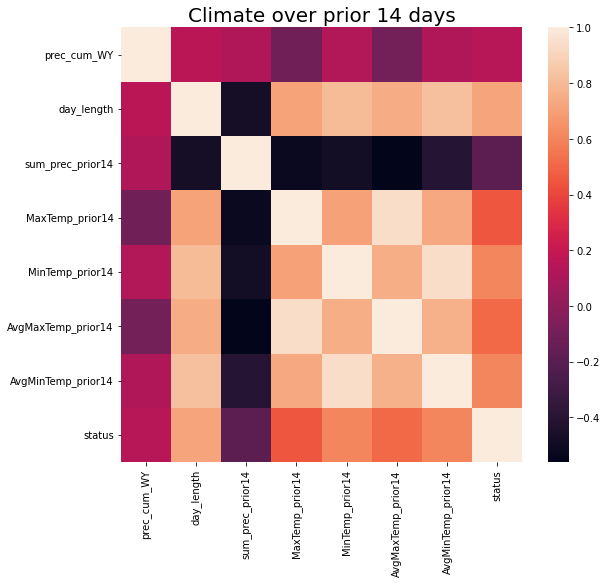

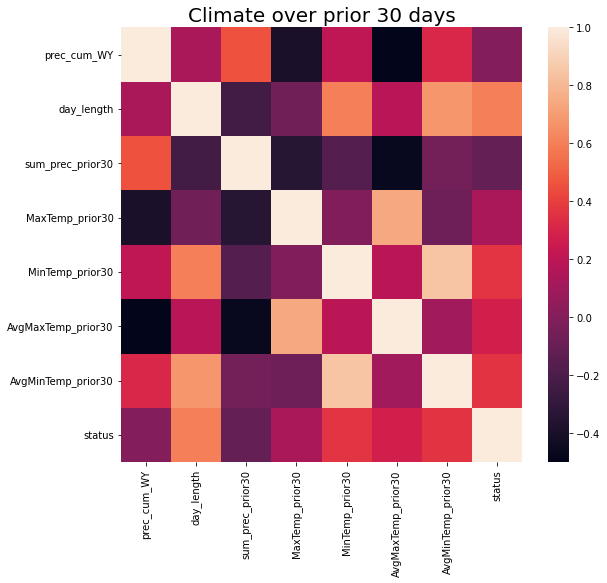

In [33]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

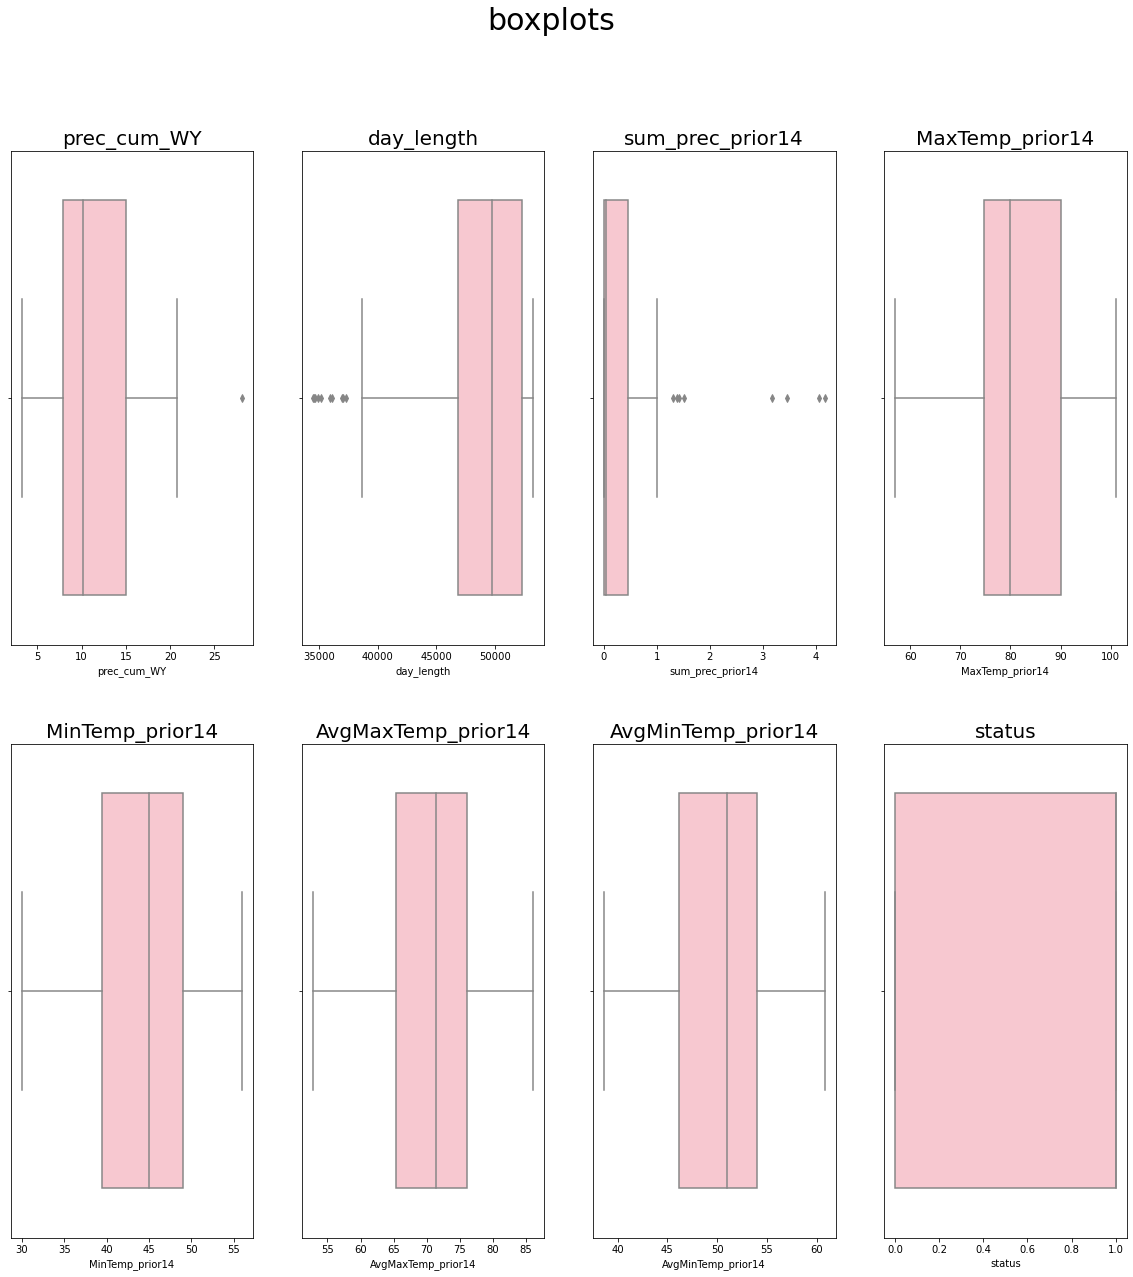

In [34]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax], color='pink')
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [35]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(104, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
4143,15.15,34589,4.17,58.0,32.0,52.785714,41.928571,0.0
4144,15.25,34679,4.06,58.0,32.0,53.142857,42.642857,0.0
4145,15.27,34899,1.00,57.0,32.0,53.357143,42.285714,0.0
4147,3.80,35190,0.91,64.0,37.0,59.714286,44.714286,0.0
4148,15.27,35939,0.00,68.0,39.0,59.357143,42.357143,0.0


In [36]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.762
Random Forest: f1-score=0.755


7


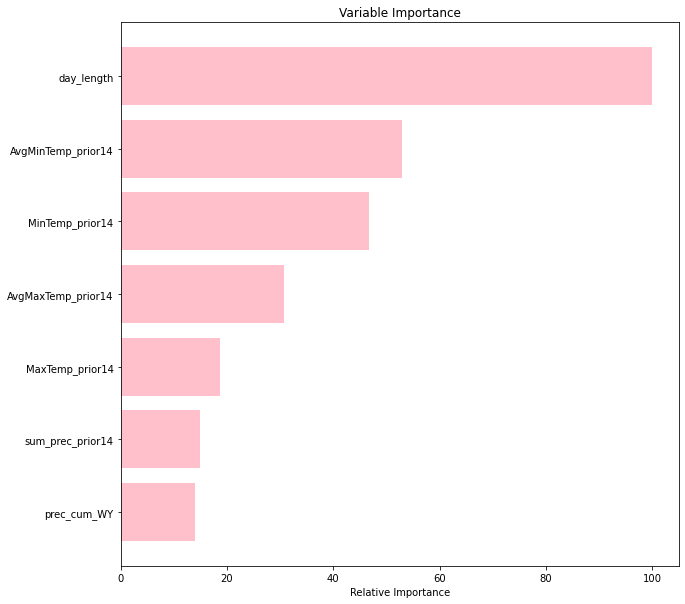

In [37]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='pink')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [38]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(104, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
4143,15.15,34589,8.94,60.0,32.0,54.200000,42.233333,0.0
4144,15.25,34679,9.04,60.0,32.0,54.100000,42.433333,0.0
4145,15.27,34899,8.99,58.0,32.0,54.000000,42.500000,0.0
4147,3.80,35190,1.61,65.0,37.0,60.566667,45.466667,0.0
4148,15.27,35939,4.07,68.0,32.0,56.266667,43.033333,0.0


In [39]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [40]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.810
Random Forest: f1-score=0.796


7


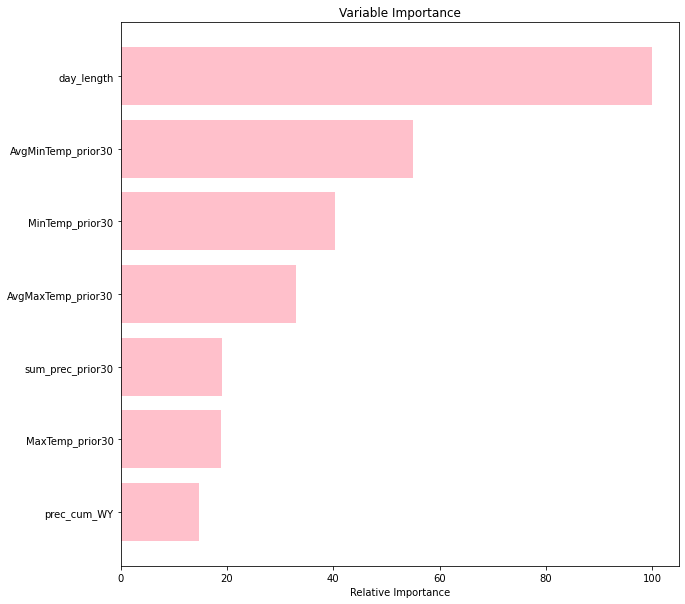

In [41]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='pink')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Senescing model: Adelinia grande, Pacific Hound's Tongue

In [42]:
df = senescing[senescing['genus_species']=='Adelinia grande']
print(df.shape)

(177, 39)


In [43]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(177, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
278,10.915,43517,2.045,67.0,33.0,56.678571,42.214286,3.0
280,5.575,43738,2.005,75.5,35.5,62.035714,44.107143,3.0
330,24.770,46907,0.515,70.5,41.0,60.535714,45.214286,3.0
337,9.190,47380,0.035,92.5,39.0,73.321429,46.321429,3.0
339,7.390,47599,1.030,79.0,38.0,64.571429,47.035714,3.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

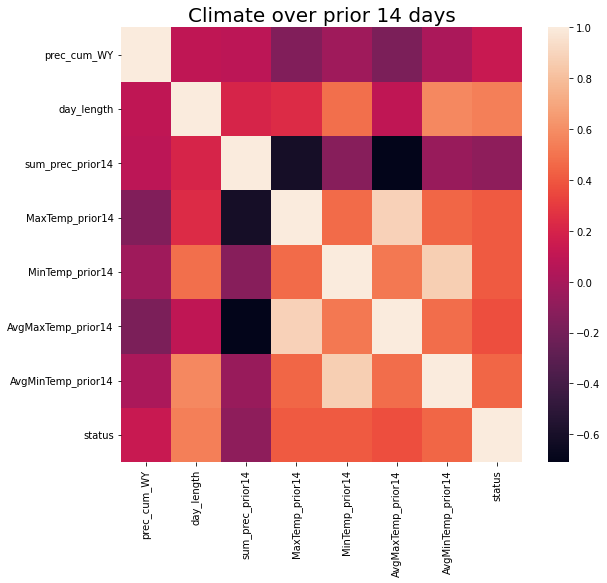

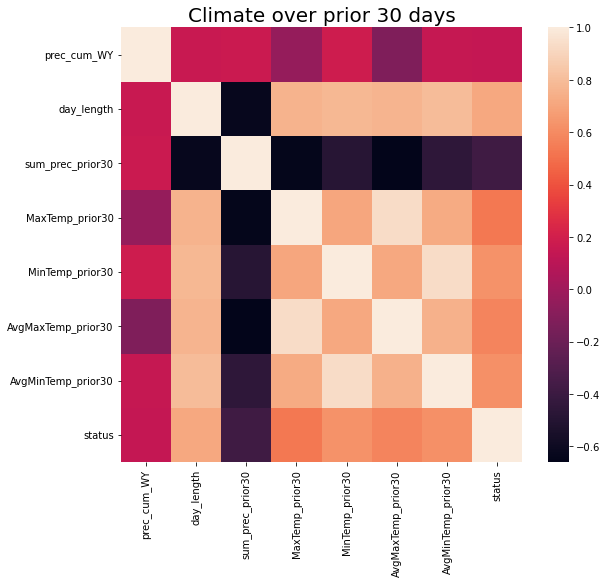

In [44]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

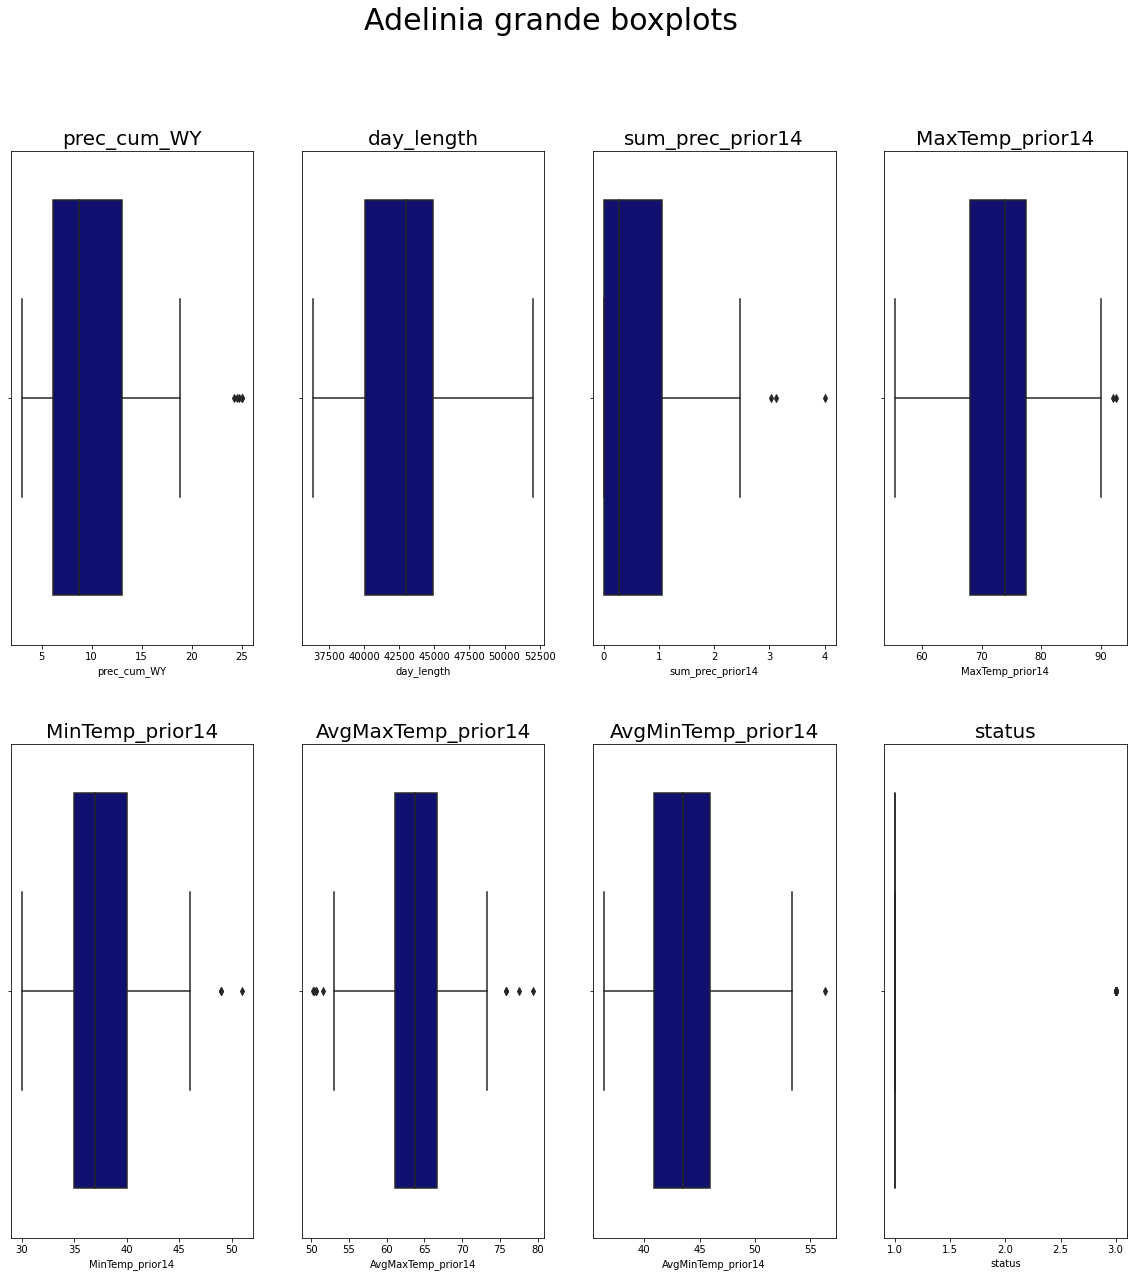

In [45]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Adelinia grande boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax], color='navy'), 
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [46]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(177, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
278,10.915,43517,2.045,67.0,33.0,56.678571,42.214286,3.0
280,5.575,43738,2.005,75.5,35.5,62.035714,44.107143,3.0
330,24.770,46907,0.515,70.5,41.0,60.535714,45.214286,3.0
337,9.190,47380,0.035,92.5,39.0,73.321429,46.321429,3.0
339,7.390,47599,1.030,79.0,38.0,64.571429,47.035714,3.0


In [47]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.917
Random Forest: f1-score=0.901


7


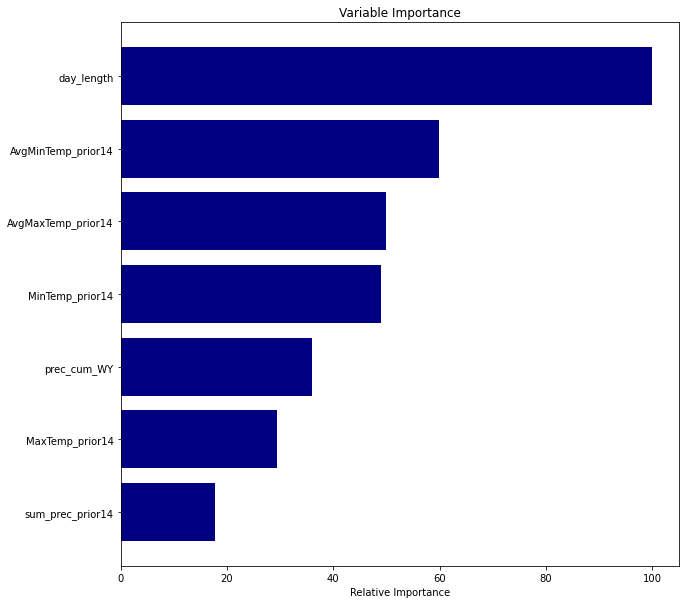

In [48]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='navy')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(177, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
278,10.915,43517,3.975,67.0,29.0,51.950000,37.316667,3.0
280,5.575,43738,2.005,78.0,35.5,66.400000,44.283333,3.0
330,24.770,46907,2.365,71.0,37.5,59.716667,43.483333,3.0
337,9.190,47380,0.415,92.5,39.0,71.766667,46.200000,3.0
339,7.390,47599,1.310,79.0,35.0,62.466667,45.100000,3.0


In [50]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [51]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.917
Random Forest: f1-score=0.901


7


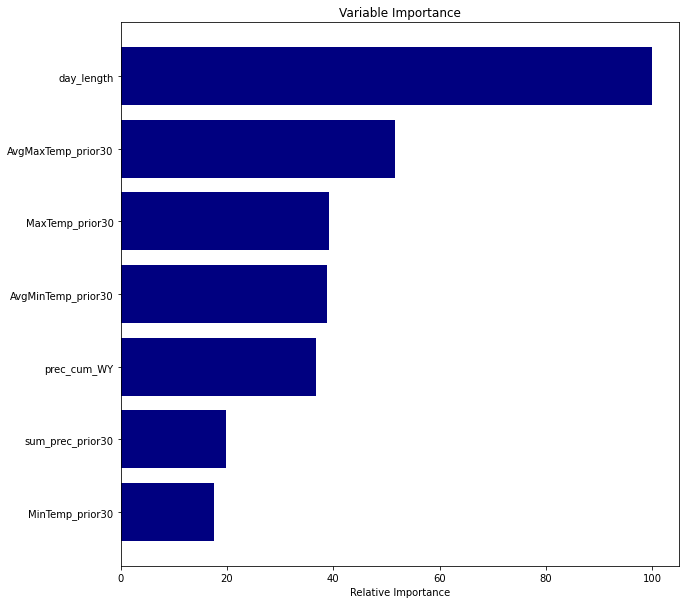

In [52]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='navy')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Plot the confusion matrices (normalized and not)

Confusion matrix, without normalization
[[31  0]
 [ 3  2]]
Normalized confusion matrix
[[1.  0. ]
 [0.6 0.4]]


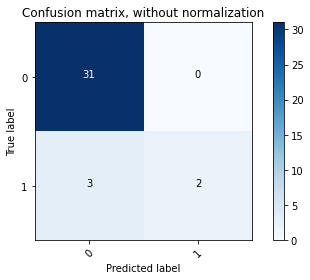

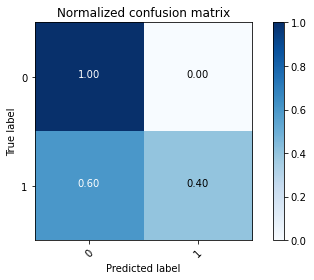

In [53]:

class_names=[0,1]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

# Senescing model: Calochortus albus, white mariposa lily


In [54]:
df = senescing[senescing['genus_species']=='Calochortus albus']
print(df.shape)

(154, 39)


In [55]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(154, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
876,15.125000,50718,0.030000,78.5,46.50,72.500000,51.142857,3.0
890,5.455000,51380,0.000000,88.0,48.50,77.964286,50.857143,3.0
903,7.580000,52845,0.000000,75.0,51.00,67.428571,52.642857,3.0
904,17.141654,53036,0.271654,86.0,48.02,72.564286,54.024286,3.0
738,15.890000,46001,0.360000,70.0,42.00,63.857143,47.428571,1.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

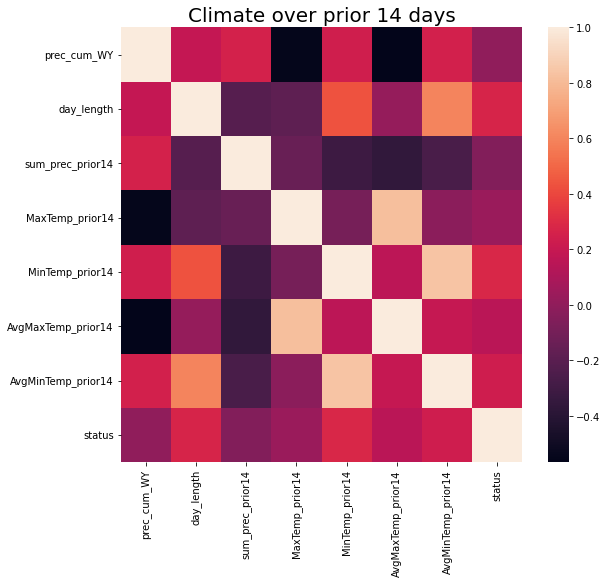

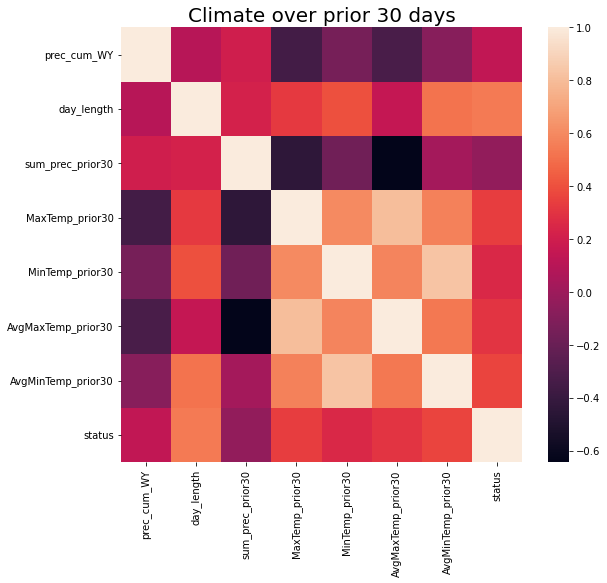

In [56]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

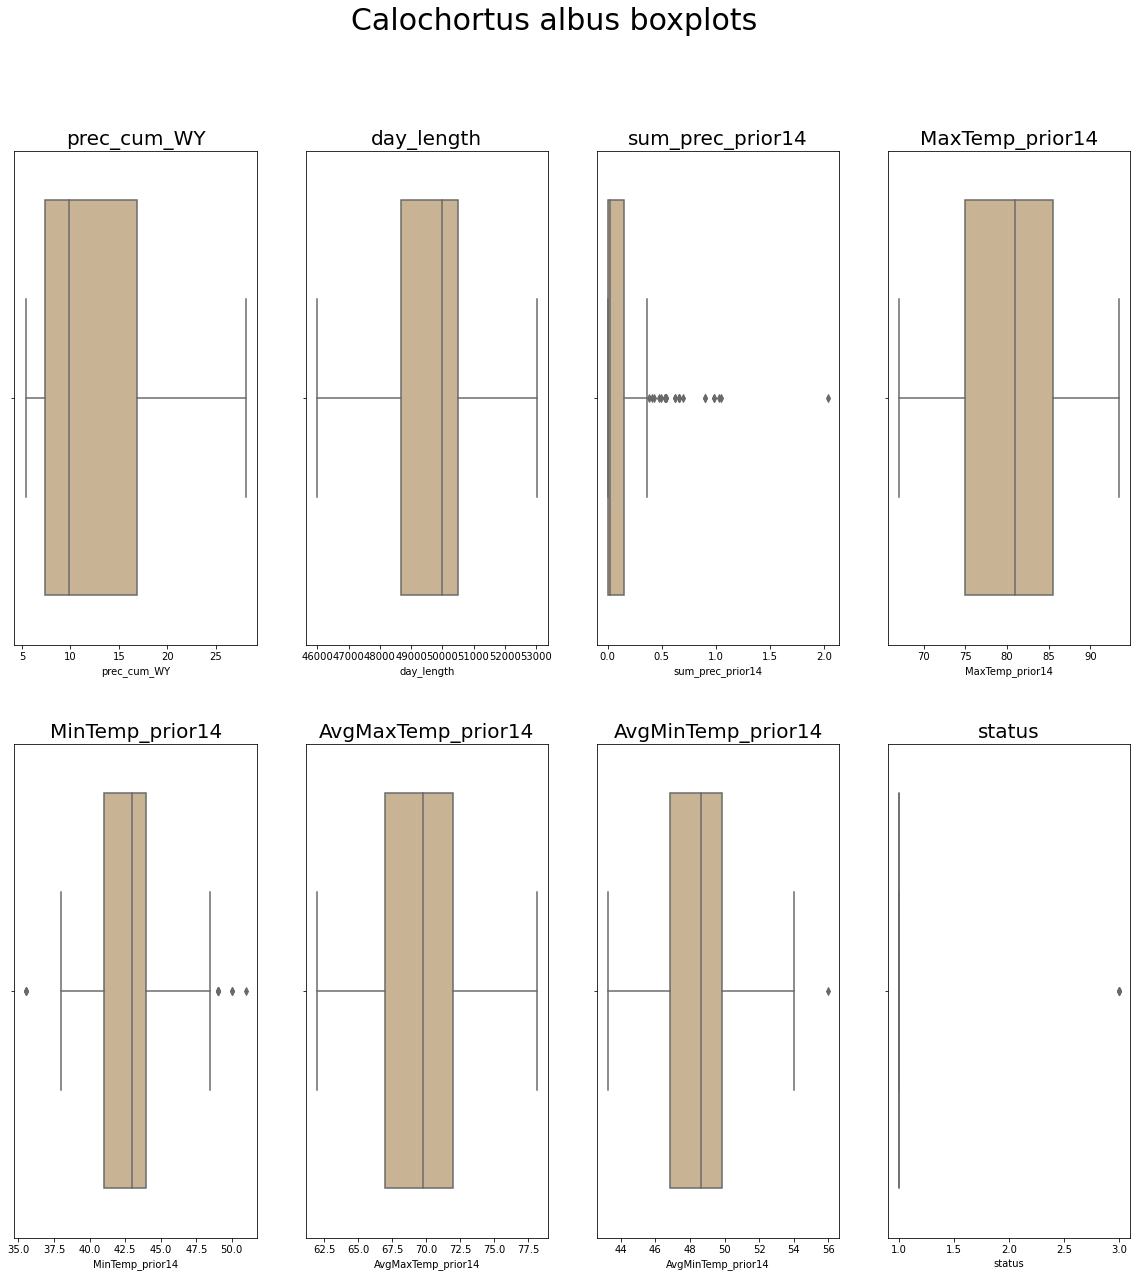

In [57]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Calochortus albus boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax], color='tan'), 
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [58]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(154, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
876,15.125000,50718,0.030000,78.5,46.50,72.500000,51.142857,3.0
890,5.455000,51380,0.000000,88.0,48.50,77.964286,50.857143,3.0
903,7.580000,52845,0.000000,75.0,51.00,67.428571,52.642857,3.0
904,17.141654,53036,0.271654,86.0,48.02,72.564286,54.024286,3.0
738,15.890000,46001,0.360000,70.0,42.00,63.857143,47.428571,1.0


In [59]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


7


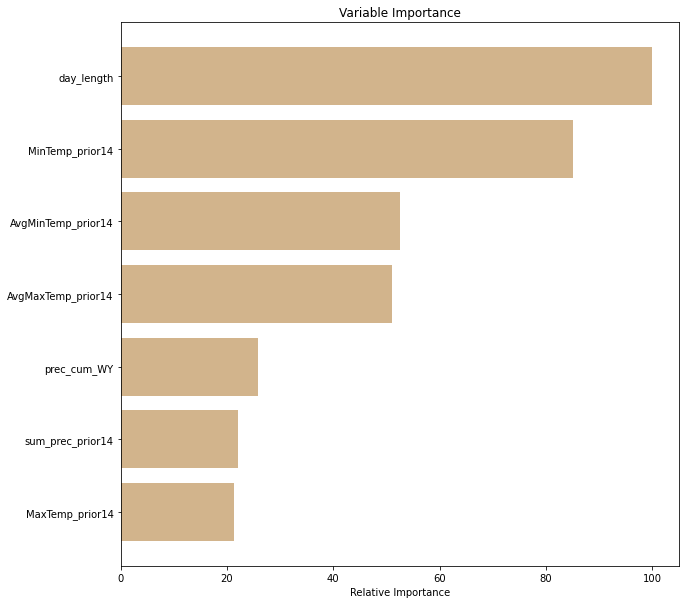

In [60]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='tan')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [61]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(154, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
876,15.125000,50718,0.090000,90.0,45.0,74.450000,50.200000,3.0
890,5.455000,51380,0.090000,88.0,41.0,75.416667,49.266667,3.0
903,7.580000,52845,0.010000,81.0,47.0,67.266667,51.633333,3.0
904,17.141654,53036,0.271654,86.0,47.0,71.996667,52.511333,3.0
738,15.890000,46001,0.530000,78.0,37.0,64.800000,45.500000,1.0


In [62]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [63]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


7


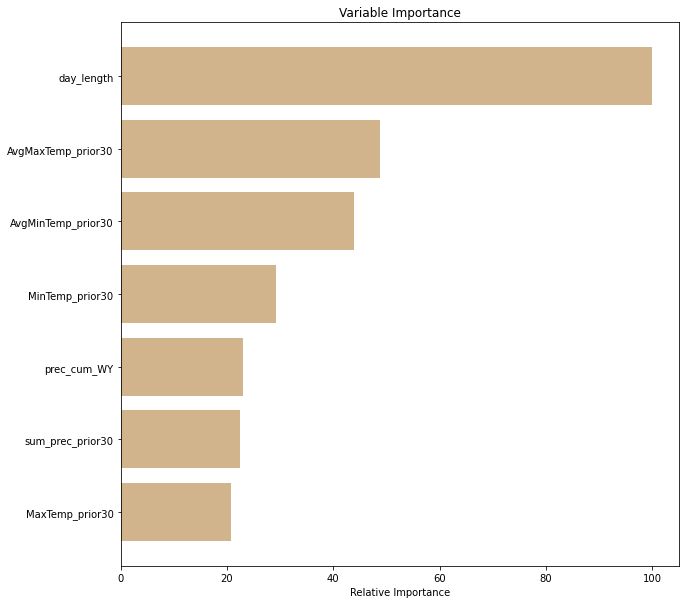

In [64]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='tan')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Plot the confusion matrices (normalized and not)

Confusion matrix, without normalization
[[31]]
Normalized confusion matrix
[[1.]]


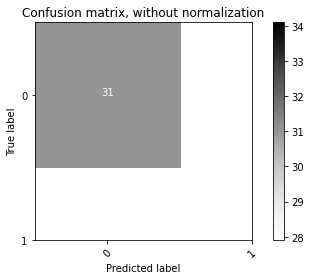

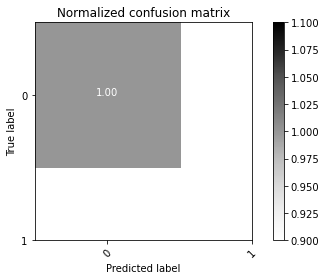

In [65]:

class_names=[0,1]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

# Senescing model: Silybum marianum, zebra thistle


In [66]:
df = senescing[senescing['genus_species']=='Calochortus albus']
print(df.shape)

(154, 39)


In [67]:
# 'WY', 'wy_month', 'WY_weeknum',

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(154, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
876,15.125000,50718,0.030000,78.5,46.50,72.500000,51.142857,3.0
890,5.455000,51380,0.000000,88.0,48.50,77.964286,50.857143,3.0
903,7.580000,52845,0.000000,75.0,51.00,67.428571,52.642857,3.0
904,17.141654,53036,0.271654,86.0,48.02,72.564286,54.024286,3.0
738,15.890000,46001,0.360000,70.0,42.00,63.857143,47.428571,1.0


<AxesSubplot:title={'center':'Climate over prior 30 days'}>

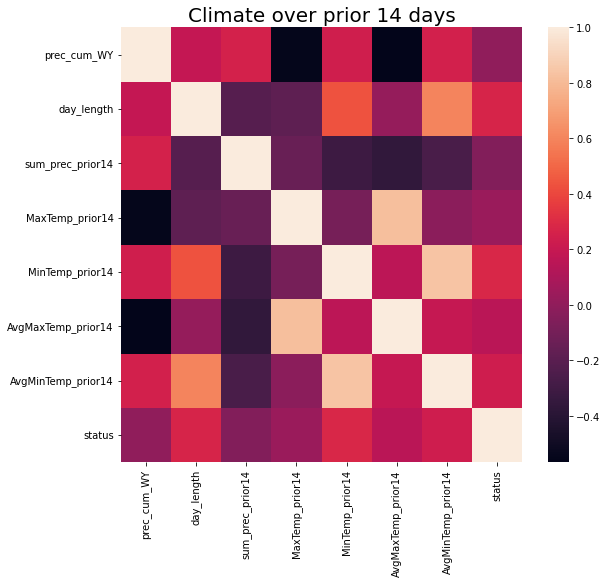

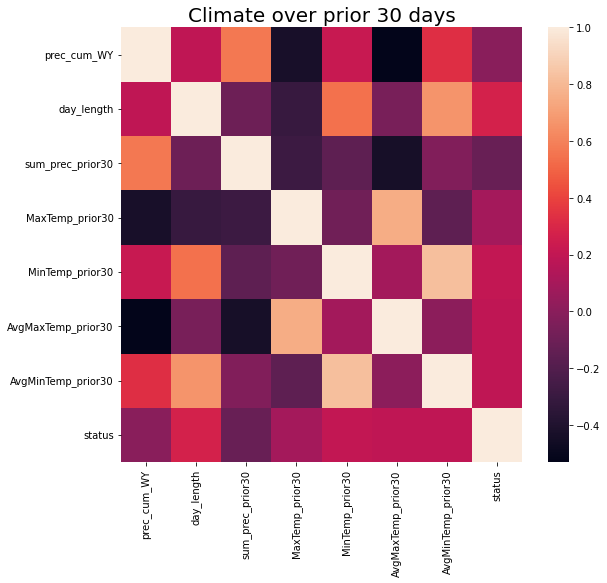

In [68]:
#Plot the correlation heat map for the features
plt.subplots(figsize=(9,8))
plt.title('Climate over prior 14 days', fontsize = 20)
sns.heatmap(df14.corr())

plt.subplots(figsize=(9,8))
plt.title('Climate over prior 30 days', fontsize = 20)
sns.heatmap(df30.corr())

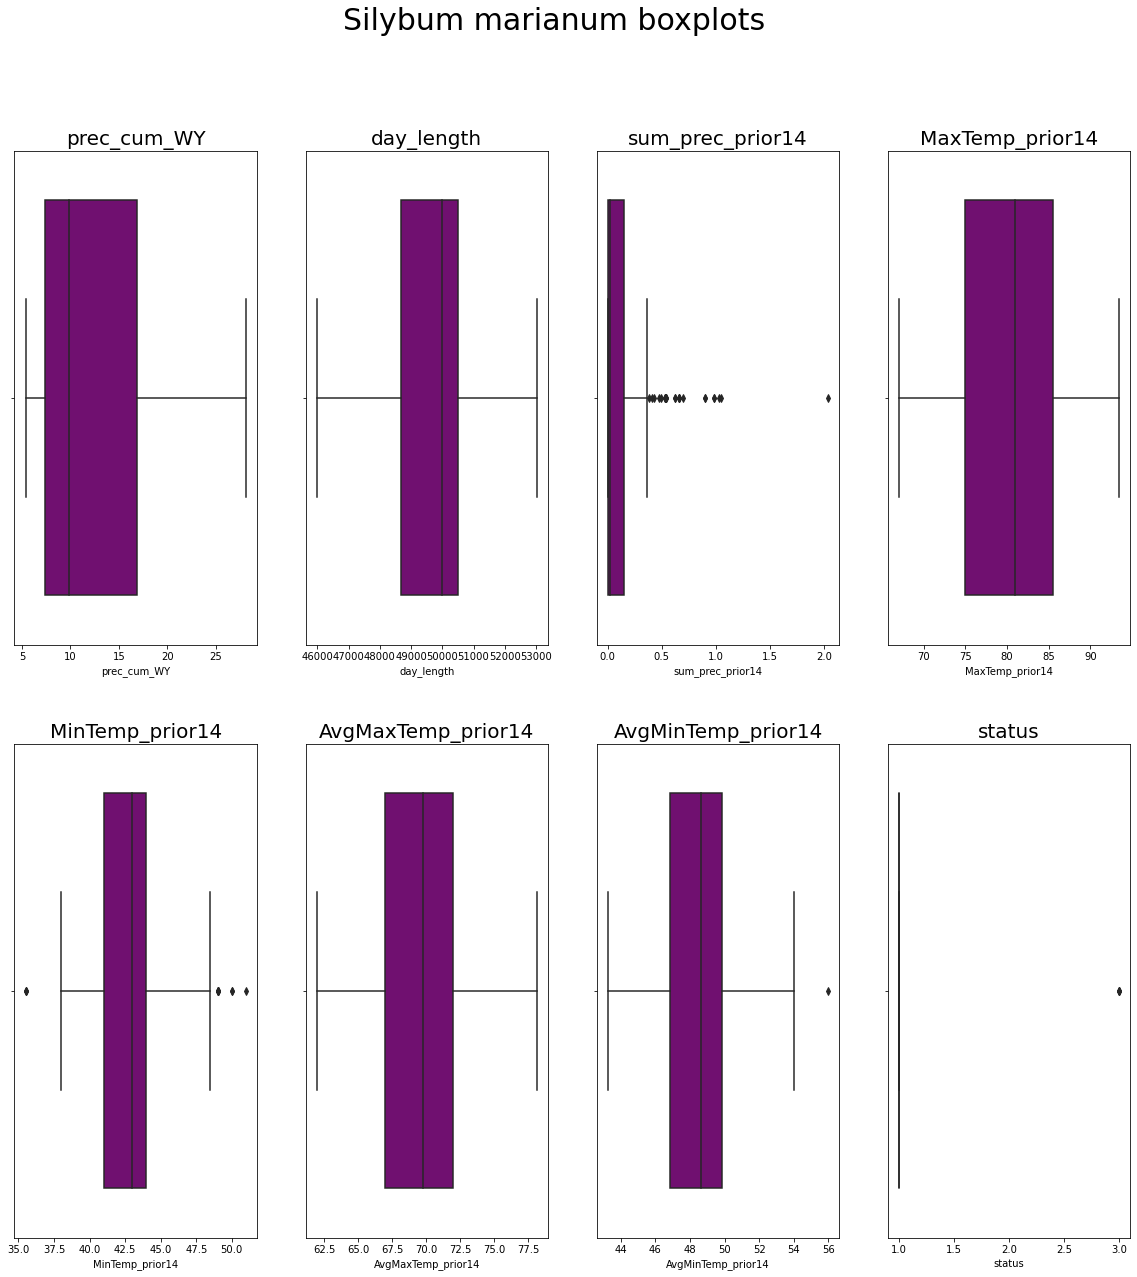

In [69]:
columns = ['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']

ax0 = [0, 1, 2, 3, 0, 1, 2, 3]
ax1 = [0, 0, 0, 0, 1, 1, 1, 1]

tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Silybum marianum boxplots', fontsize=30)

for col, ax in zip(columns, tups):
    sns.boxplot(x=df14[col], ax=axes[ax], color='purple'), 
    axes[ax].set_title(str(col), fontsize=20)

# Splitting Data into Training and Test sets

In [70]:

#model variables for 14 days prior to observation
df14 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior14', 
           'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 
           'status']]
print(df14.shape)
df14.head()



(154, 8)


,prec_cum_WY,day_length,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,status
876,15.125000,50718,0.030000,78.5,46.50,72.500000,51.142857,3.0
890,5.455000,51380,0.000000,88.0,48.50,77.964286,50.857143,3.0
903,7.580000,52845,0.000000,75.0,51.00,67.428571,52.642857,3.0
904,17.141654,53036,0.271654,86.0,48.02,72.564286,54.024286,3.0
738,15.890000,46001,0.360000,70.0,42.00,63.857143,47.428571,1.0


In [71]:
#Create dummy features for object type features.
X = df14.drop('status', axis=1)
X = pd.get_dummies(X)
y = df14['status']

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


7


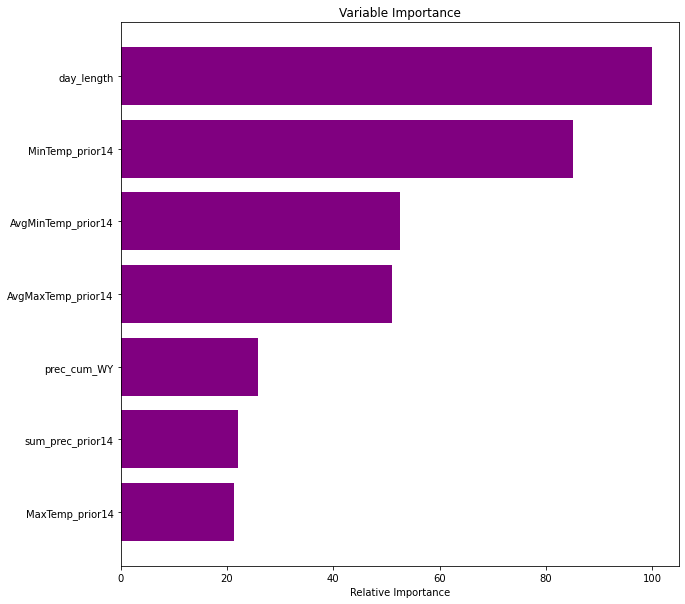

In [72]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='purple')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [73]:
#model variables for 30 days prior to observation
df30 = df[['prec_cum_WY', 'day_length', 'sum_prec_prior30', 
           'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 
           'status']]
print(df30.shape)
df30.head()

(154, 8)


,prec_cum_WY,day_length,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,status
876,15.125000,50718,0.090000,90.0,45.0,74.450000,50.200000,3.0
890,5.455000,51380,0.090000,88.0,41.0,75.416667,49.266667,3.0
903,7.580000,52845,0.010000,81.0,47.0,67.266667,51.633333,3.0
904,17.141654,53036,0.271654,86.0,47.0,71.996667,52.511333,3.0
738,15.890000,46001,0.530000,78.0,37.0,64.800000,45.500000,1.0


In [74]:
#Create dummy features for object type features.
X = df30.drop('status', axis=1)
X = pd.get_dummies(X)
y = df30['status']

In [75]:

#define X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#implement the random forest classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


7


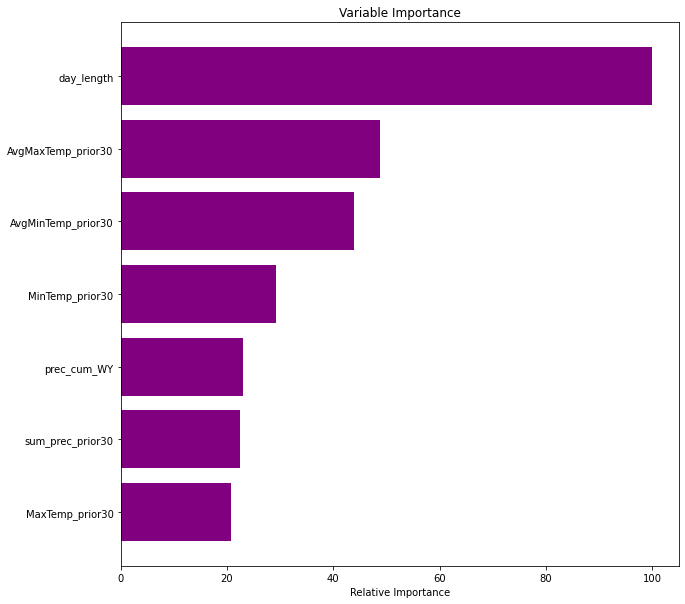

In [76]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='purple')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Plot the confusion matrices (normalized and not)

Confusion matrix, without normalization
[[31]]
Normalized confusion matrix
[[1.]]


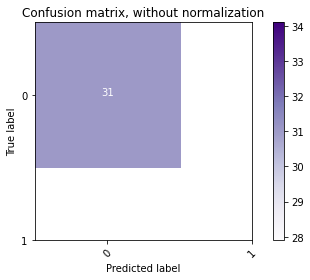

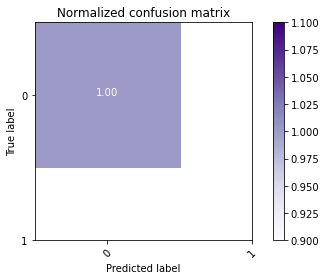

In [77]:

class_names=[0,1]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()